# Pràctica II - Perceptron amb Scikit-learn

En la sessió anterior hem implementat i entrenat un perceptró des de zero, analitzant pas a pas el seu funcionament intern. Ara, donarem un pas més i treballarem amb la implementació ja disponible a la llibreria scikit-learn, que ens permetrà concentrar-nos en el procés d’aplicació del model a un conjunt de dades real.

Per tal d’il·lustrar-ho, farem servir el problema del Titanic, que ja coneixeu del curs anterior. L’objectiu és predir si un passatger va sobreviure o no al naufragi a partir d’algunes de les seves característiques (edat, sexe, classe del bitllet, etc.).

Tasques a realitzar

1. Carregar i preparar les dades
   - Importar el conjunt de dades del Titanic.
   - Seleccionar les variables més rellevants i realitzar els preprocessaments necessaris (tractament de valors NaNs, codificació de variables categòriques i normalització).
   - Dividir les dades en conjunts d’entrenament i validació.

2. Definir i entrenar el model
   - Utilitzar la classe Perceptron de ``sklearn.linear_model``.
   - Ajustar el model amb les dades d’entrenament.
   - Utilitzar el perceptró implementat la sessió anterior per comparar resultats.

3. Avaluar el rendiment
   - Calcular la *accuracy* sobre les dades de validació.
   - Analitzar la matriu de confusió per entendre millor els encerts i errors del model.
   - Comparar els resultats de ``scikit-learn`` amb la vostra implementació prèvia.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

Podeu trobar les dades del Titanic a [Kaggle](https://www.kaggle.com/competitions/titanic/overview).

In [23]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

## Neteja de dades

### Codificació de variables categòriques

Farem servir la codificació *one-hot* per a les variables categòriques, ``pandas`` té una funció que ens ho facilita: ``get_dummies()``.

In [24]:
train = pd.get_dummies(train, columns=["Sex", "Embarked"])
test = pd.get_dummies(test, columns=["Sex", "Embarked"])


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,False,True,True,False,False


In [25]:
train = train.fillna(train.mean(numeric_only=True))
test = test.fillna(test.mean(numeric_only=True))

In [26]:
train.isna().sum()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [27]:
train.drop(columns=["Cabin", "Name"])
test.drop(columns=["Cabin", "Name"])

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,330911,7.8292,False,True,False,True,False
1,893,3,47.00000,1,0,363272,7.0000,True,False,False,False,True
2,894,2,62.00000,0,0,240276,9.6875,False,True,False,True,False
3,895,3,27.00000,0,0,315154,8.6625,False,True,False,False,True
4,896,3,22.00000,1,1,3101298,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,A.5. 3236,8.0500,False,True,False,False,True
414,1306,1,39.00000,0,0,PC 17758,108.9000,True,False,True,False,False
415,1307,3,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,False,True,False,False,True
416,1308,3,30.27259,0,0,359309,8.0500,False,True,False,False,True


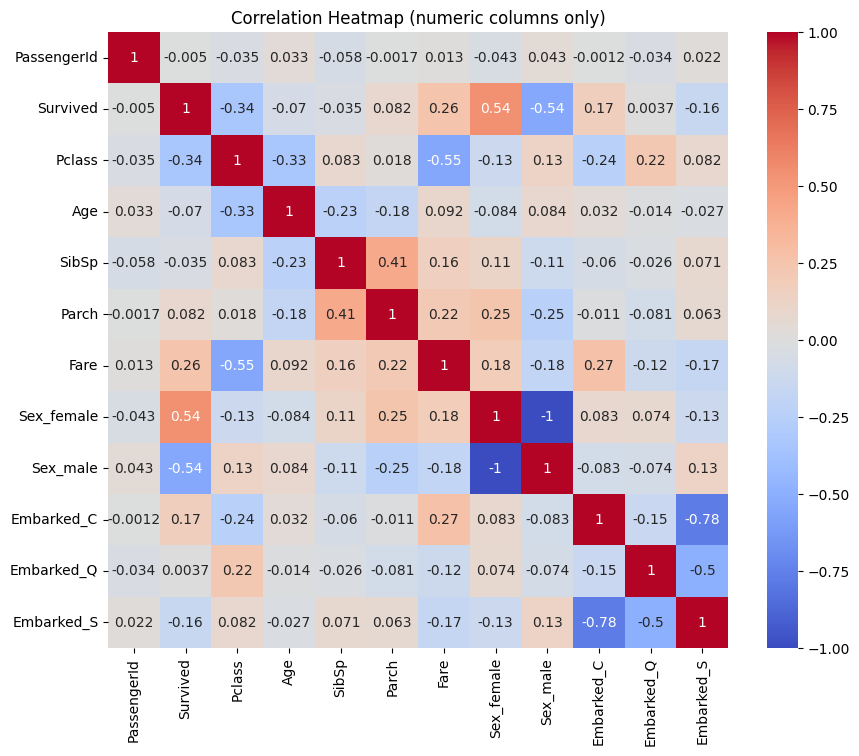

In [ ]:
corr = train.select_dtypes(include=["number", "bool"]).corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,False,True,True,False,False


### Eliminació de les columnes sense informació

Hi ha algunes columnes que no aporten informació rellevant per a la predicció, com ara el nom del passatger o el número del bitllet. Les hem d'eliminar.

In [28]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [ ]:
train.value_counts()


PassengerId  Survived  Pclass  Name                                      Age        SibSp  Parch  Ticket      Fare    Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
1            0         3       Braund, Mr. Owen Harris                   22.000000  1      0      A/5 21171   7.250   False       True      False       False       True          1
599          0         3       Boulos, Mr. Hanna                         29.699118  0      0      2664        7.225   False       True      True        False       False         1
588          1         1       Frolicher-Stehli, Mr. Maxmillian          60.000000  1      1      13567       79.200  False       True      True        False       False         1
589          0         3       Gilinski, Mr. Eliezer                     22.000000  0      0      14973       8.050   False       True      False       False       True          1
590          0         3       Murdlin, Mr. Joseph                       29.699118  0      0      A./5. 3

### Normalitzam les dades

Hem de normalitzar les dades per tal que totes les característiques tinguin la mateixa escala. Això és especialment important per a algorismes com el perceptró, que són sensibles a la magnitud de les característiques.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(
    scaler.fit_transform(train.select_dtypes(include="number")),
    columns=train.select_dtypes(include="number").columns
)

train_normalized = pd.concat([train_scaled, train.select_dtypes(exclude="number")], axis=1)

train_normalized.drop(columns=["Name", "Ticket"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151,False,True,False,False,True
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136,True,False,True,False,False
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,True,False,False,False,True
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644,True,False,False,False,True
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374,False,True,False,False,True
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556,True,False,False,False,True
888,0.997753,0.0,1.0,0.367921,0.125,0.333333,0.045771,True,False,False,False,True
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556,False,True,True,False,False


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaled = pd.DataFrame(
    scaler.fit_transform(test.select_dtypes(include="number")),
    columns=test.select_dtypes(include="number").columns
)

test_normalized = pd.concat([test_scaled, test.select_dtypes(exclude="number")], axis=1)

test_normalized.drop(columns=["Name", "Ticket"])

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282,False,True,False,True,False
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663,True,False,False,False,True
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909,False,True,False,True,False
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908,False,True,False,False,True
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.396975,0.000,0.000000,0.015713,False,True,False,False,True
414,0.992806,0.0,0.512066,0.000,0.000000,0.212559,True,False,True,False,False
415,0.995204,1.0,0.505473,0.000,0.000000,0.014151,False,True,False,False,True
416,0.997602,1.0,0.396975,0.000,0.000000,0.015713,False,True,False,False,True


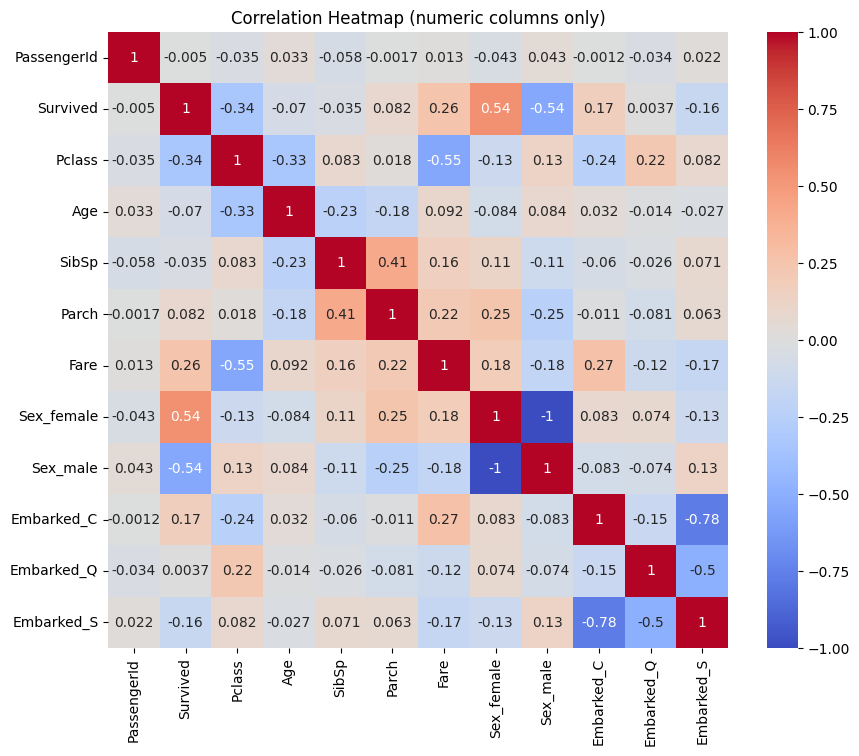

In [ ]:
corr_normalized = train_normalized.select_dtypes(include=["number", "bool"]).corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_normalized, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()

### Tractament de valors NaN

Els valors NaN els hem de tractar abans d'entrenar el model. Podem optar per eliminar les files amb valors NaN o bé imputar-los amb la mitjana, mediana o moda de la columna. Pandas ens ofereix diverses funcions per fer-ho. Per exemple, podem utilitzar ``fillna()`` per imputar valors, o ``dropna()`` per eliminar files amb valors NaN.

### Divisió del conjunt de dades

Separarem les dades en un conjunt d'entrenament i un de validació. Això ens permetrà avaluar el rendiment del model en dades que no ha vist durant l'entrenament. S'utilitza la funció ``train_test_split()`` de ``sklearn.model_selection``.

## Entrenament i avaluació del model

Hem d'entrenar el perceptró amb les dades d'entrenament i després avaluar-lo amb les dades de validació. Hem de fer dos entrenaments, un amb la nostra implementació i un altre amb la de ``scikit-learn``. Per emprar la de ``scikit-learn``, utilitzarem la classe ``Perceptron`` de ``sklearn.linear_model``.

In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, 


features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = train[features]
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)



score = perceptron.score(X_val, y_val)
print(f"Accuracy {score:.3f}")


score_lr = lr.score(X_val, y_val)
print(f"Accuracy {score_lr:.3f}")

rt = RandomForestClassifier()
rt.fit(X_train, y_train)
score_rt = rt.score(X_val, y_val)
print(f"Accuracy {score_rt:.3f}")


Accuracy 0.698
Accuracy 0.799
Accuracy 0.816


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
